In [145]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [92]:
wcat=pd.read_csv('wc-at.csv')
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [93]:
# her waist is our independent variable and 'at' is our dependent  variable 

In [94]:
wcat.shape

(109, 2)

In [95]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [96]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [97]:
numeric_data=wcat.select_dtypes(include=['float64','float64'])

In [98]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

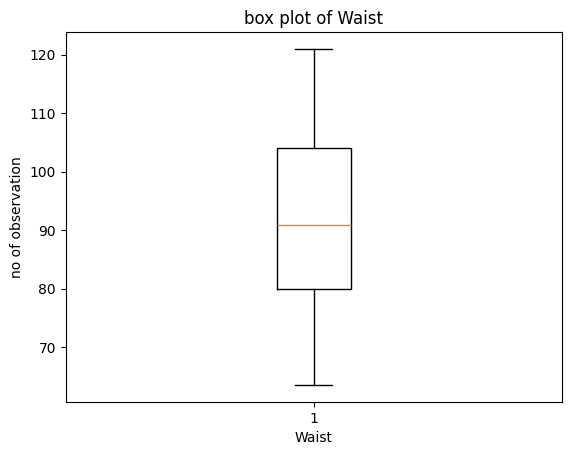

In [99]:
plt.boxplot(wcat.Waist)
plt.xlabel("Waist")
plt.ylabel("no of observation")
plt.title("box plot of Waist")
plt.show()

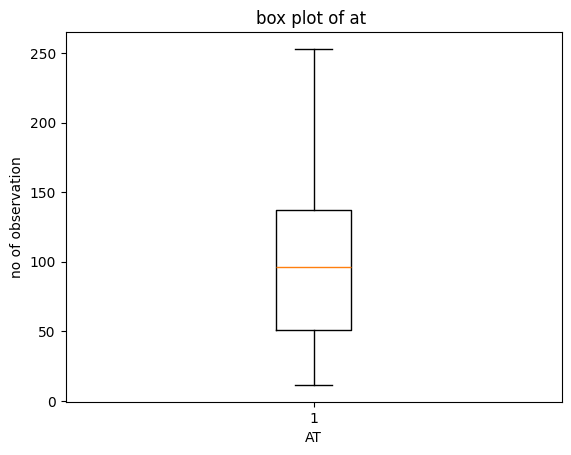

In [100]:
plt.boxplot(wcat.AT)
plt.xlabel("AT")
plt.ylabel("no of observation")
plt.title("box plot of at ")
plt.show()

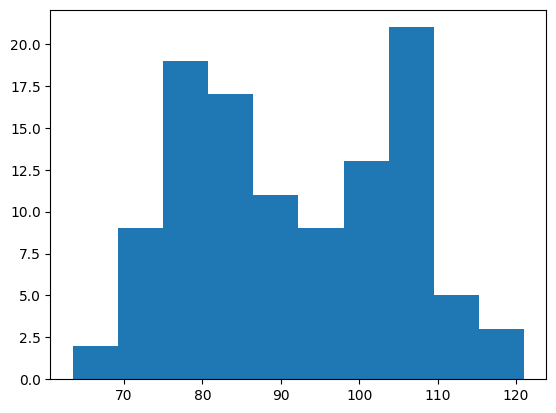

In [101]:
plt.hist(wcat.Waist)
plt.show()

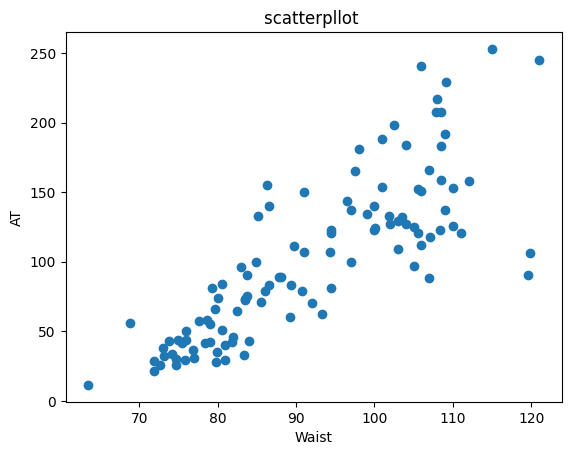

In [102]:
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("scatterpllot ")
plt.show()

In [103]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [104]:
# from above correlation we got a very strong co relation of 0.81 between waist and at 

In [105]:
# now start buldiing ur model 
import statsmodels.formula.api as smf 

In [106]:
model=smf.ols("AT~Waist",data=wcat).fit()
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [107]:
# from the above code wher fit() is used to fit the model ,model.params: This returns the coefficients of the regression model

In [108]:
# from the outout we get b0=108.237 and b1=3.4588

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.62e-27
Time:                        22:04:37   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# now we do predictions 
pred=model.predict(wcat.Waist)
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [111]:
model.resid # resid will give u all the errors in the model 


0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [112]:
# so the above values are the errors for indivudalu values 
# to find the overall error 


In [113]:
 # the measurement we are going to use is "root means square error " so error=actualvalue - predicted value  then take saquare of error and mean of error 

In [114]:
rmse_line = np.sqrt(np.mean((np.array(wcat['AT']) - np.array(pred))**2))  # here we use np.array to convert the values into array for any mathematical operation
rmse_line

np.float64(32.760177495755144)

In [115]:
# the above is rmse vale of model-1 only for linear model after try to vizualize the data 
# sqrt means square root and 

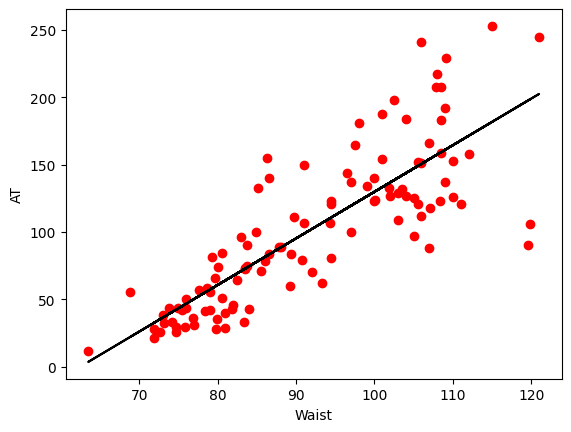

In [116]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='red')
plt.plot(wcat['Waist'], pred, color='black')
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()


In [117]:
# to improve r**2 values we have difffernt types which helps in transformation of r**2 values 
# 1. log transformation 
# 2. exponential transformation
# 3. square transformation
# 4.log+ square transformation 

In [118]:
 # we are using log transformation so that our equation is y=b0+b1  after log transformation y = b0+b1*log(x)

In [119]:
model2=smf.ols("AT~np.log(Waist)",data=wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           6.80e-28
Time:                        22:04:37   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

~: This symbol means "is modeled as a function of". It separates the dependent variable from the independent variables.

In [120]:
# after using log transformaton r**2 value is slightly increased from 0.6070 to 0.675 

In [121]:
pred2=model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [122]:
# now have to find the rmse value of this model 

In [123]:
rmse_log=np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log

np.float64(32.49688490932125)

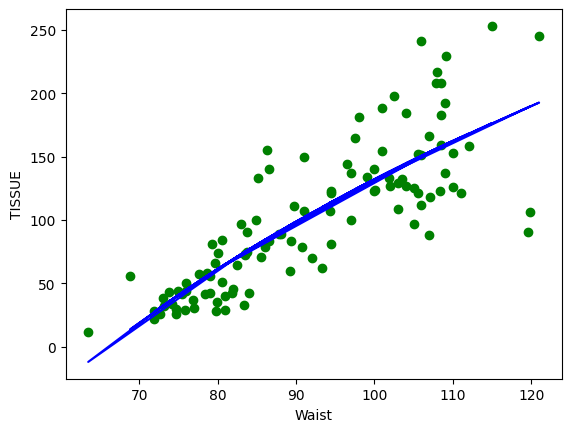

In [124]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat['Waist'], pred2, color='blue')
plt.xlabel('Waist')
plt.ylabel('TISSUE')
plt.show()

In [125]:
# so u did not achive required r**2 value so we have ti try another transformatiom 
# next is exponential transformation

![example](example.png)

In [126]:
# exponential transformation 
model3=smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           2.68e-30
Time:                        22:04:37   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# here we are able to increase the r**2 value from 0.675 to 0.707

In [128]:
pred_log=model3.predict(pd.DataFrame(wcat['Waist']))
pred_log

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

![exapmle_2](example_2.png)

In [129]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [130]:
rmse_exp=np.sqrt(np.mean((np.array(wcat['AT']-np.array(pred3))**2)))
rmse_exp

np.float64(38.52900175807137)

In [131]:
pred3.corr(wcat.AT)

np.float64(0.7633804583650529)

Text(0, 0.5, 'AT')

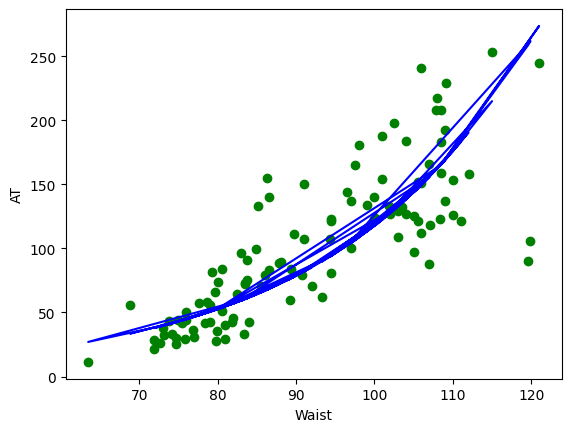

In [132]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat.Waist, pred3, color='blue')
plt.xlabel('Waist')
plt.ylabel('AT')


In [133]:
# 4 model square model transfoemation  

![square_transformation](square_transformation.png)

- so we need square for the number 
- so we are creating new coloum as wirst square   "Wist_Sq"


In [134]:
wcat["Waist_Sq"]=wcat.Waist*wcat.Waist #
wcat

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
...,...,...,...
104,100.10,124.00,10020.0100
105,93.30,62.20,8704.8900
106,101.80,133.00,10363.2400
107,107.90,208.00,11642.4100


In [135]:
model_quad=smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
model_quad.params

Intercept   -7.824071
Waist        0.228864
Waist_Sq    -0.001016
dtype: float64

In [136]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.80e-35
Time:                        22:04:37   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
# previous we got r**2 value of o.707 now we get 0.779
# next we pedect the values of od waist square 

In [138]:
pred_quad=model_quad.predict(wcat)
pred_quad4=np.exp(pred_quad)   # as we have used log(AT) in preparing model so we need to convert it back 
pred_quad4

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [139]:
rmse_squad=np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred_quad4))**2))
rmse_squad

np.float64(32.24444782776017)

In [140]:
#  which ever model having highest r**2 valu and least rmse value that model is going to be ur best model  
#  this is how ur able to increase  r**2 value and decrease rmse value 
#  by transformation 
# in stats we always double check ur answers and cross verify ur answers 
# 1 is r**2 ,2 is rmse ,3 is 
# how do u conform this model is valaid or conform model ?
# there is a concept of model validation tequinques (MVT )
# with the hepl of this tequnic we can able to validate the model and we can able to say that this model is valid or not


- model validation tequinques (MVT )
- in this what ever the error we got first standize that model it means convert that error into z-scores 
- to get that we have to use model.resid_pearson
- this will convert errors intlo z score values 
-

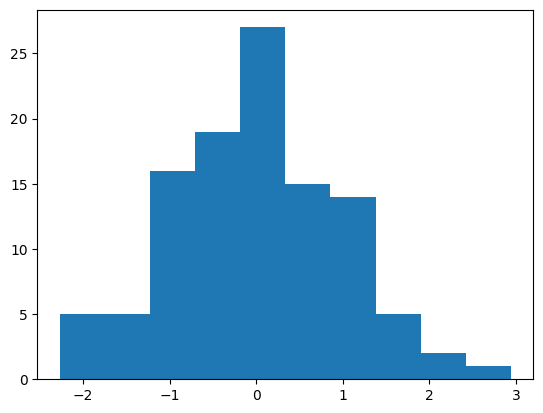

In [141]:
plt.hist(model_quad.resid_pearson)
plt.show()

![mvt_1](mvt_1.png)

- try to create a histogram on ur standardize error 
- mean value of standardize value is 0
- and ur standardize error have constant varance 
- so when ever standardize error having mean value of zero and they are having constant varance then u can say what ever model u develp is a valid model 
- then u can conclude what ever model u develp is a valid model 

In [143]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
